In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import warnings
# 1. Uploading CSV
file_path = "/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv"  
data = pd.read_csv("/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv")
data = pd.read_csv("/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv", encoding='latin1')
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 1000)
def shorten_video_name(name, max_length=10):
    return name if len(name) <= max_length else name[:max_length] + '...'

data['Video Name'] = data['Video Name'].apply(shorten_video_name)
# 2. Data Review
data.drop(columns=['Adjusted Watching Time (min)'], inplace=True)
print("Data Preview:")
print(data.head())  
print("\nData Informationi:")
print(data.info()) 
print("\nMissing Data Check:")
print(data.isnull().sum())  

# 3. Data Cleansing (Removing Missing Values)
data = data.dropna()  
print("\nNumber of Rows After Cleaning Missing Values:", len(data))

# 4. Annual Total Watching Time
data['Year'] = pd.to_datetime(data['Date']).dt.year  
yearly_totals = data.groupby('Year')['Watching Time (min)'].sum().reset_index()

print("\nTotal Watching Time per Year:")
print(yearly_totals)

# 5. Total Watching Time by Genres
genre_totals = data.groupby('Genre')['Watching Time (min)'].sum().reset_index()

print("\nTotal Watching Time by Genre:")
print(genre_totals)

# 6. Annual Watching Period by Genres
yearly_genre_totals = data.groupby(['Year', 'Genre'])['Watching Time (min)'].sum().reset_index()

print("\nAnnual Watching Time by Genre:")
print(yearly_genre_totals)



Data Preview:
      Video Name                                              Channel Name                                          URL        Date      Time      Genre  Watching Time (min)  Year
0  2022 YILIN...                                               Multiplayer  https://www.youtube.com/watch?v=xeeS5Bx5SYQ  2025-01-10  06:04:16     Movies                   14  2025
1  East Duo -...  ááá ááá¦áá¨áááá â¢ Gia Bagashvili  https://www.youtube.com/watch?v=ZqeCjnEI4b0  2025-01-09  09:41:31      Music                    4  2025
2  á©á£áá...                                        Chub1na.Ge - Topic  https://www.youtube.com/watch?v=cJvCuBlYUqc  2025-01-09  09:41:16      Music                   13  2025
3  Naughty Bo...                                            NaughtyBoyVEVO  https://www.youtube.com/watch?v=3O1_3zBUKM8  2025-01-09  08:21:51  Education                   30  2025
4  2022 YILIN...                                               Multiplayer  https://ww

/var/folders/nb/plf4y00s5514s8jmqjq92rvr0000gn/T/ipykernel_26761/4087103454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_totals, x='Year', y='Watching Time (min)', palette='viridis')


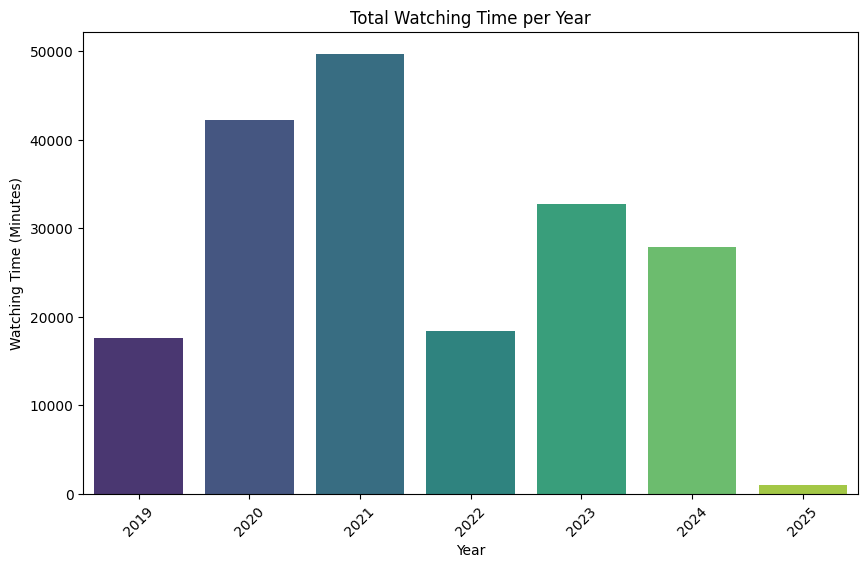

/var/folders/nb/plf4y00s5514s8jmqjq92rvr0000gn/T/ipykernel_26761/4087103454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_totals, x='Genre', y='Watching Time (min)', palette='coolwarm')


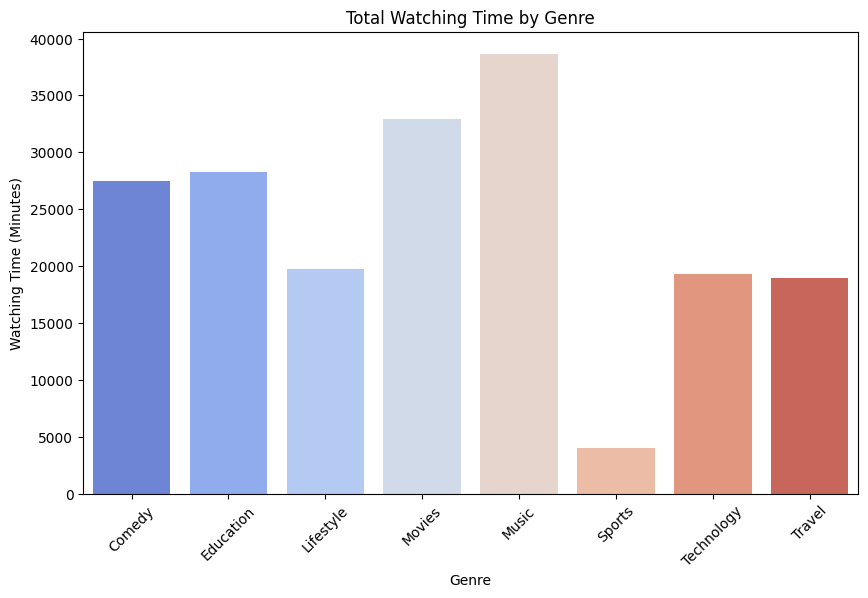

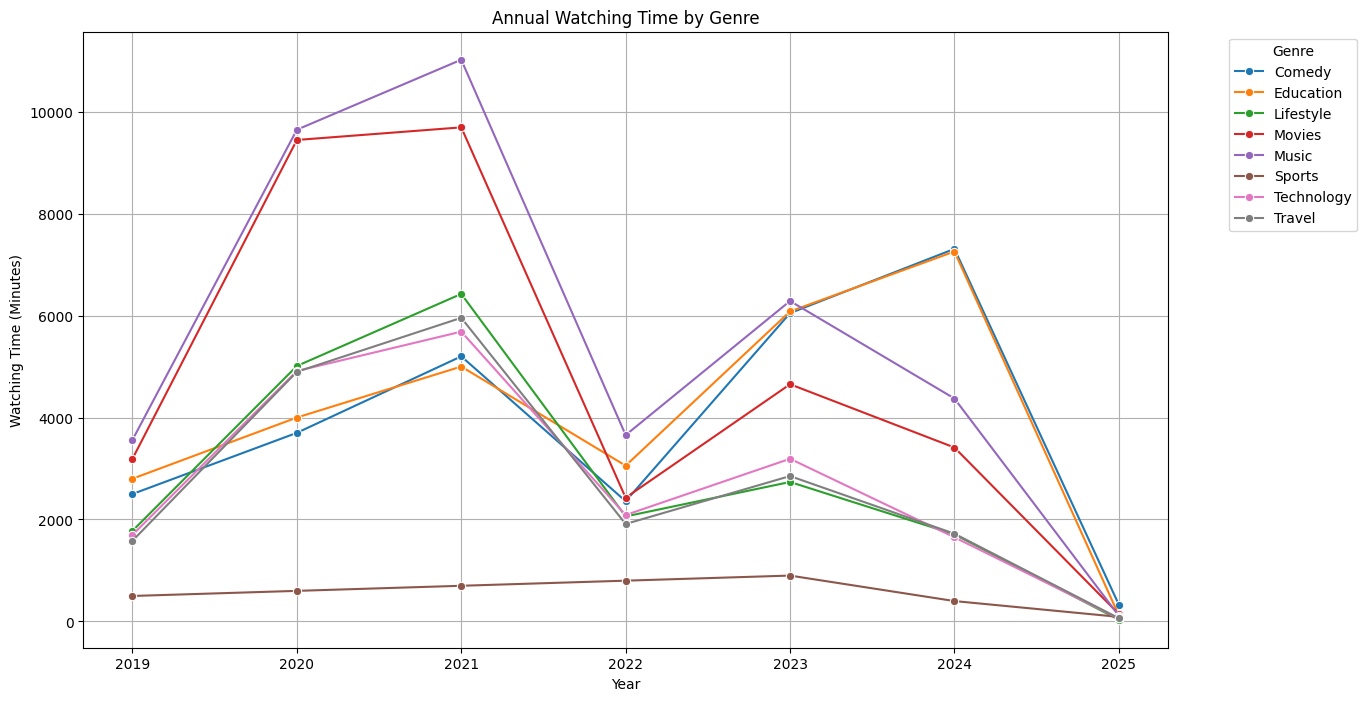

In [26]:
# 7. Visualizing
# Annual Watching Time Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals, x='Year', y='Watching Time (min)', palette='viridis')
plt.title('Total Watching Time per Year')
plt.xlabel('Year')
plt.ylabel('Watching Time (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Graph of total watching time by genres
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_totals, x='Genre', y='Watching Time (min)', palette='coolwarm')
plt.title('Total Watching Time by Genre')
plt.xlabel('Genre')
plt.ylabel('Watching Time (Minutes)')
plt.xticks(rotation=45)
plt.show()

# Annual Watching Time by Genre Graph
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_genre_totals, x='Year', y='Watching Time (min)', hue='Genre', marker='o')
plt.title('Annual Watching Time by Genre')
plt.xlabel('Year')
plt.ylabel('Watching Time (Minutes)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


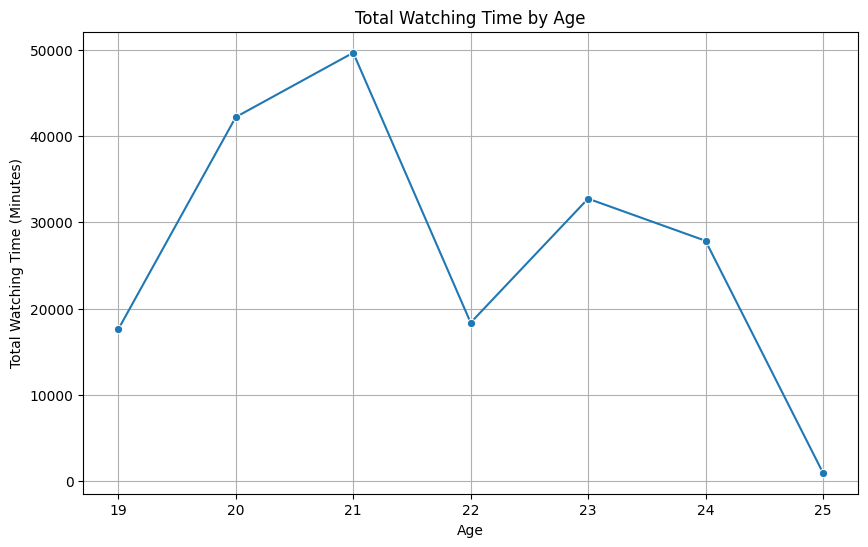

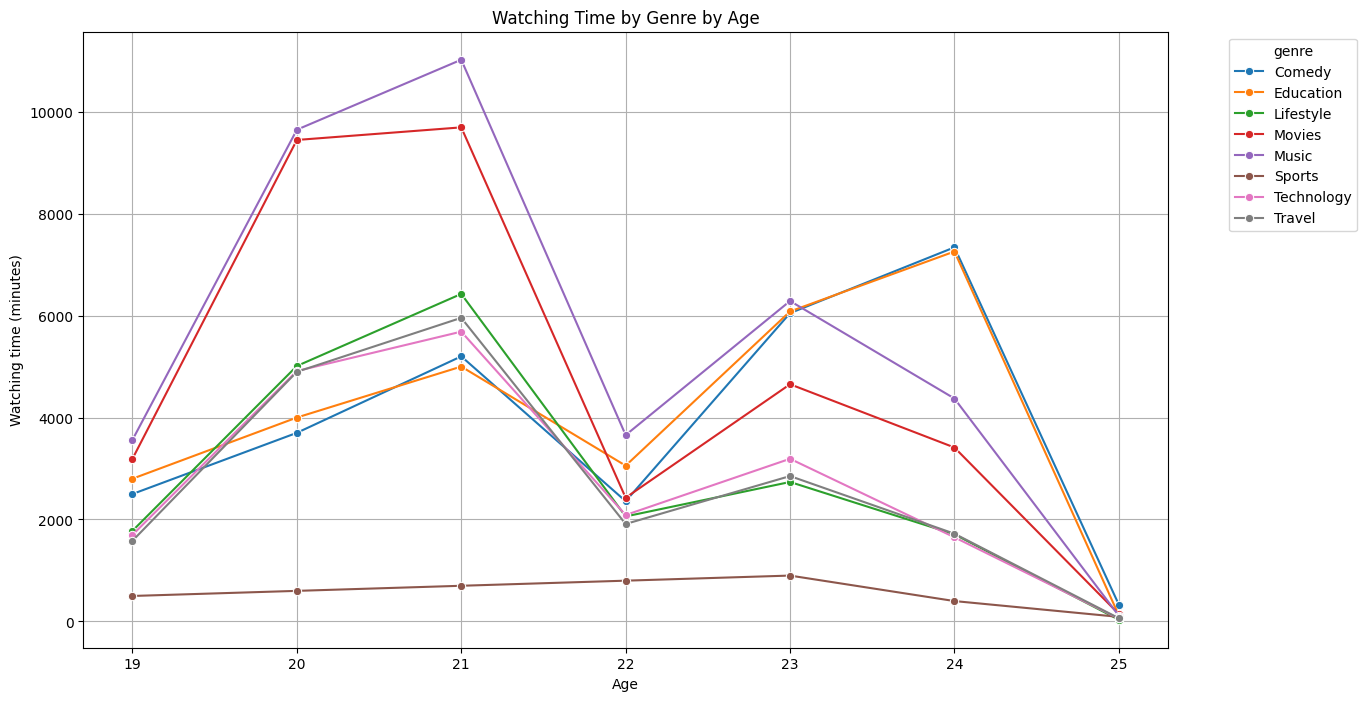

Total Watching Time per Year:
   Year  Watching Time (min)
0  2019                17612
1  2020                42212
2  2021                49677
3  2022                18358
4  2023                32747
5  2024                27862
6  2025                  954

Change with Age by Genre:
    Age       Genre  Watching Time (min)
0    19      Comedy                 2500
1    19   Education                 2800
2    19   Lifestyle                 1778
3    19      Movies                 3191
4    19       Music                 3562
5    19      Sports                  500
6    19  Technology                 1698
7    19      Travel                 1583
8    20      Comedy                 3700
9    20   Education                 4000
10   20   Lifestyle                 5011
11   20      Movies                 9445
12   20       Music                 9646
13   20      Sports                  600
14   20  Technology                 4913
15   20      Travel                 4897
16   21      C

In [24]:
birth_year = 2000

file_path = "/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv"  
data = pd.read_csv("/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv")


data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year 

# Age Calculation
data['Age'] = data['Year'] - birth_year

# 1. Watching Time per Year
yearly_totals = data.groupby('Year')['Watching Time (min)'].sum().reset_index()

# 2. Watching Time by Age 
age_totals = data.groupby('Age')['Watching Time (min)'].sum().reset_index()

# 3. Watching time by age by genre
age_genre_totals = data.groupby(['Age', 'Genre'])['Watching Time (min)'].sum().reset_index()

# 4. Visualizing

# a. Total Watching Time by Age Graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_totals, x='Age', y='Watching Time (min)', marker='o')
plt.title('Total Watching Time by Age')
plt.xlabel('Age')
plt.ylabel('Total Watching Time (Minutes)')
plt.grid(True)
plt.show()

# b.Watching Time by Genre by Age Graph
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_genre_totals, x='Age', y='Watching Time (min)', hue='Genre', marker='o')
plt.title('Watching Time by Genre by Age')
plt.xlabel('Age')
plt.ylabel('Watching time (minutes)')
plt.legend(title='genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 5. Annual change analysis (optional printout)
print("Total Watching Time per Year:")
print(yearly_totals)
print("\nChange with Age by Genre:")
print(age_genre_totals)

In [16]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 1000)  


# Data Uploading
file_path = "/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv"  
data = pd.read_csv("/Users/aybuke/PycharmProjects/PythonProject2/youtube_data.csv")

# Converting 'Date' column to datetime format and adding year information
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

def shorten_video_name(name, max_length=10):
    return name if len(name) <= max_length else name[:max_length] + '...'

data['Video Name'] = data['Video Name'].apply(shorten_video_name)


# Selected relevant columns
formatted_data = data[['Video Name', 'Channel Name', 'Genre', 'Watching Time (min)', 'Year']]

# Checking the output

print(formatted_data.head(15)) 
formatted_data.to_csv("formatted_youtube_data.csv", index=False, encoding='utf-8')


       Video Name                    Channel Name       Genre  Watching Time (min)  Year
0   2022 YILIN...                     Multiplayer      Movies                   14  2025
1   East Duo -...  გია ბაღაშვილი • Gia Bagashvili       Music                    4  2025
2          ჩუბინა              Chub1na.Ge - Topic       Music                   13  2025
3   Naughty Bo...                  NaughtyBoyVEVO   Education                   30  2025
4   2022 YILIN...                     Multiplayer      Movies                   13  2025
5   Japonya’da...                    Tunca Arslan      Movies                   14  2025
6   Fatih Alta...                   Fatih Altaylı   Lifestyle                   15  2025
7   Oyun Dünya...                     Multiplayer      Comedy                   30  2025
8   İçimizde B...                     Multiplayer      Movies                   19  2025
9   StatQuest ...     StatQuest with Josh Starmer      Comedy                   30  2025
10  İçimizde B...    

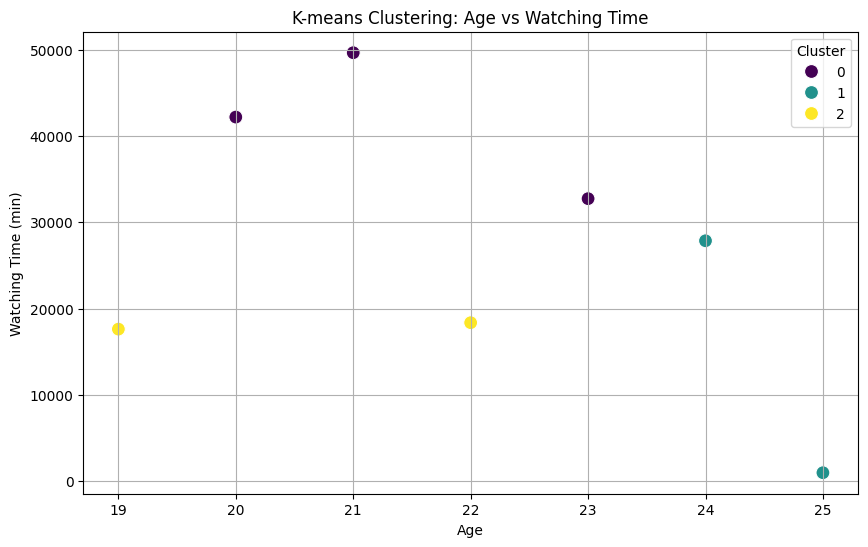


Cluster Merkezleri:
         Age  Watching Time (min)
0  21.333333         41545.333333
1  24.500000         14408.000000
2  20.500000         17985.000000


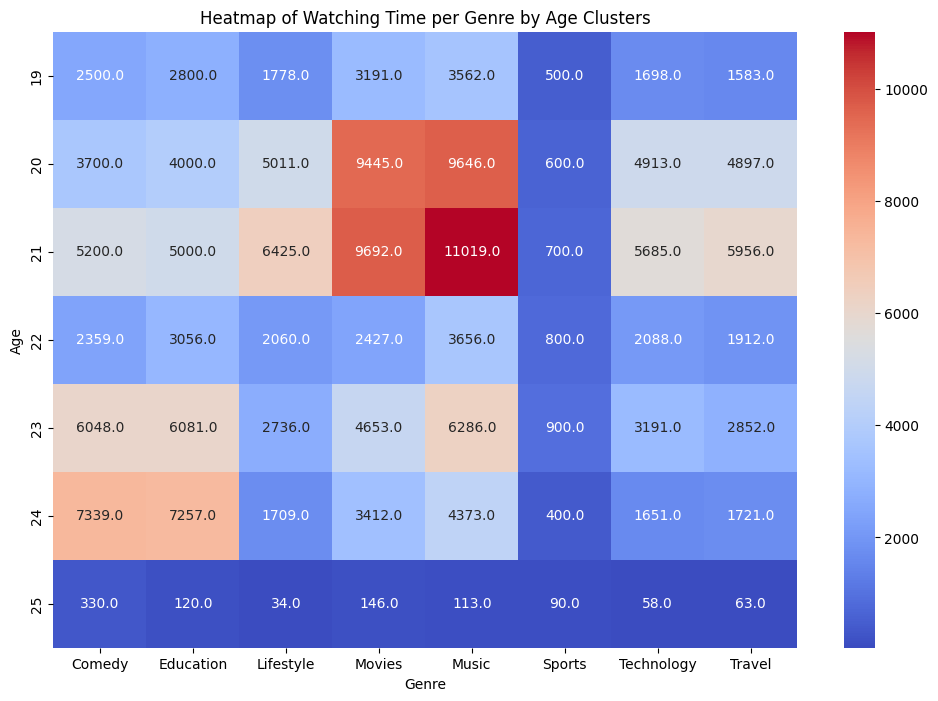

In [23]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year  

# Calculating Age
data['Age'] = data['Year'] - birth_year

#1. Total Watching time by year
yearly_totals = data.groupby('Year')['Watching Time (min)'].sum().reset_index()

#2. Total viewing time by age
age_totals = data.groupby('Age')['Watching Time (min)'].sum().reset_index()

# Data to be prepared for clustering
clustering_data = age_totals.copy()

# Scaling Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data[['Age', 'Watching Time (min)']])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Watching Time (min)',
    hue='Cluster',
    data=clustering_data,
    palette='viridis',
    s=100
)
plt.title('K-means Clustering: Age vs Watching Time')
plt.xlabel('Age')
plt.ylabel('Watching Time (min)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Show cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['Age', 'Watching Time (min)'])
print("\nCluster Merkezleri:")
print(centers_df)

# Clustering by age based on genres
age_genre_totals = data.groupby(['Age', 'Genre'])['Watching Time (min)'].sum().reset_index()

# Data preparation
age_genre_clustering = age_genre_totals.pivot(index='Age', columns='Genre', values='Watching Time (min)').fillna(0)
scaled_age_genre_data = scaler.fit_transform(age_genre_clustering)

# New K-means clustering
kmeans_genre = KMeans(n_clusters=3, random_state=42)
clusters_genre = kmeans_genre.fit_predict(scaled_age_genre_data)

# Visualization by adding clusters by age
age_genre_clustering['Cluster'] = clusters_genre
plt.figure(figsize=(12, 8))
sns.heatmap(age_genre_clustering.drop(columns='Cluster'), cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Watching Time per Genre by Age Clusters')
plt.xlabel('Genre')
plt.ylabel('Age')
plt.show()